# Email Spam Filtering   (150 points)

The dataset is from [Ling-spam corpus](http://www.aueb.gr/users/ion/data/lingspam_public.tar.gz). I have extraced a number of spam and ham emails from it. The data is already split into a training set and a test set. 

The training set is in the folder named "train", and the test set is in the folder named "test". For the training set, files whose names have the form spmsg*.txt are spam messages. All other files are legitimate messages.

However, the test data does *not* contain the labels in the file names. **Your goal is to train the best model you can using the training data, then make your predictions on the test data and upload them to WTClass.**

## Question 1 (10 points)
Import the following libraries: `os`, `numpy` as *np*, `pandas` as *pd*.

In [1]:
#solution #DONE

import os
import numpy as np
import pandas as pd

## Question 2 (20 points)
From the train dataset seperate the spam and ham filenames and store them in the variables `spam_filenames` and `ham_filenames` 
respectively.

In [2]:
#solution #DONE

current=os.getcwd()
print(current)
EMAILS=os.path.join(current,"train")
TEST_EMAILS=os.path.join(current,"test")
print(EMAILS)
print(TEST_EMAILS)
contents = os.listdir(current)
print(contents)

/Users/lindsayperkins/Desktop/Machine Learning/Week 9/Week 9 Lab Assignment
/Users/lindsayperkins/Desktop/Machine Learning/Week 9/Week 9 Lab Assignment/train
/Users/lindsayperkins/Desktop/Machine Learning/Week 9/Week 9 Lab Assignment/test
['sampleemail.txt', '.DS_Store', 'Week 9 Lab Solutions - Lindsay Perkins.ipynb', 'test', 'mails', 'my_solution.csv', 'train', '.ipynb_checkpoints']


In [3]:
#DONE but don't think I did it the most effective way, could slice by string??
#luckily they were already sorted
#Do I need the first part?

def read_files(filename,path=EMAILS):
    with open(os.path.join(path, filename),'r') as f1:
         lines = f1.read()
    return lines

email_files = [name for name in sorted(os.listdir(EMAILS))]
spam_filenames=email_files[1201:]
ham_filenames=email_files[1:1200]


test_filenames=[name for name in sorted(os.listdir(TEST_EMAILS))]

In [4]:
#first file name is strange and i am not sure how that happened??
print(email_files[0])
print(spam_filenames[0])
print(ham_filenames[0])
print(test_filenames[0])

.ipynb_checkpoints
spmsga100.txt
3-1msg1.txt
000.txt


## Question 3 (20 points)
Define a function `load_email()` that can read the contents of a specified filename and return the contents of the file.

In [5]:
# solution #DONE 

def load_email(filename,path=EMAILS):
    with open(os.path.join(path, filename),'r') as f1:
         read = f1.read()
    return read


read = load_email(spam_filenames[0])
read

"Subject: want best economical hunt vacation life ?\n\nwant best hunt camp vacation life , felton 's hunt camp wild wonderful west virginium . $ 50 . 0 per day pay room three home cook meal ( pack lunch want stay wood noon ) cozy accomodation . reserve space . follow season book 1998 : buck season - nov . 23 - dec . 5 doe season - announce ( please call ) muzzel loader ( deer ) - dec . 14 - dec . 19 archery ( deer ) - oct . 17 - dec . 31 turkey sesson - oct . 24 - nov . 14 e - mail us 110734 . 2622 @ compuserve . com\n"

## Question 4 (20 points)
Using `load_email()` read all the emails and store them inside the corresponding arrays `ham_emails` and `spam_emails`.

In [6]:
# solution  #DONE
#do I need the first part?

current=os.getcwd()
EMAILS=os.path.join(current,"train")

ham_emails = [load_email(filename=name) for name in ham_filenames]
spam_emails=[load_email(filename=name)for name in spam_filenames]


current=os.getcwd()
TEST_EMAILS=os.path.join(current,"test")
def load_email2(filename,path=TEST_EMAILS):
    with open(os.path.join(path, filename),'r') as f1:
         read = f1.read()
    return read

test_emails=[load_email2(filename=name) for name in test_filenames]

In [7]:
ham_emails

['Subject: re : 2 . 882 s - > np np\n\n> date : sun , 15 dec 91 02 : 25 : 02 est > from : michael < mmorse @ vm1 . yorku . ca > > subject : re : 2 . 864 queries > > wlodek zadrozny asks if there is " anything interesting " to be said > about the construction " s > np np " . . . second , > and very much related : might we consider the construction to be a form > of what has been discussed on this list of late as reduplication ? the > logical sense of " john mcnamara the name " is tautologous and thus , at > that level , indistinguishable from " well , well now , what have we here ? " . to say that \' john mcnamara the name \' is tautologous is to give support to those who say that a logic-based semantics is irrelevant to natural language . in what sense is it tautologous ? it supplies the value of an attribute followed by the attribute of which it is the value . if in fact the value of the name-attribute for the relevant entity were \' chaim shmendrik \' , \' john mcnamara the name \' w

In [8]:
spam_emails

["Subject: want best economical hunt vacation life ?\n\nwant best hunt camp vacation life , felton 's hunt camp wild wonderful west virginium . $ 50 . 0 per day pay room three home cook meal ( pack lunch want stay wood noon ) cozy accomodation . reserve space . follow season book 1998 : buck season - nov . 23 - dec . 5 doe season - announce ( please call ) muzzel loader ( deer ) - dec . 14 - dec . 19 archery ( deer ) - oct . 17 - dec . 31 turkey sesson - oct . 24 - nov . 14 e - mail us 110734 . 2622 @ compuserve . com\n",
 'Subject: email 57 million $ 99\n\n57 million email addresses $ 99 want money ? put touch over 50 million virtually cost . one cent each thesis name ? profit over $ 500 , 0 . 0 \'s right , 57 million fresh email address sell $ 99 . fresh address include almost every person internet today , duplication . sort ready mail . best deal anywhere today ! imagine sell product $ 5 1 / 10 % response . \'s $ 2 , 850 , 0 pocket ! ! ! n\'t believe ? kind money right same thing , 

In [9]:
test_emails

['Subject: re : 2 . 882 s - > np np\n\n> deat : sun , 15 dec 91 2 : 25 : 2 est > : michael < mmorse @ vm1 . yorku . ca > > subject : re : 2 . 864 query > > wlodek zadrozny ask " anything interest " > construction " s > np np " . . . second , > much relate : consider construction form > discuss list late reduplication ? > logical sense " john mcnamara name " tautologous thus , > level , indistinguishable " , , here ? " . \' john mcnamara name \' tautologous support those logic-base semantics irrelevant natural language . sense tautologous ? supplies value attribute follow attribute value . fact value name-attribute relevant entity \' chaim shmendrik \' , \' john mcnamara name \' false . tautology , . ( reduplication , either . )\n',
 'Subject: s - > np + np\n\ndiscussion s - > np + np remind ago read , source forget , critique newsmagazine \' unique tendency write style , most writer overly " cute " . one item tersely put down follow : " \'s favorite : colon . " - - - - - - - - - - - - 

## Question 5 (10 points)

Use the following code snippet to create `X_train` and `y_train`.

```python
X_train = np.array(ham_emails + spam_emails)
y_train = np.array([0] * len(ham_emails) + [1] * len(spam_emails)) #0:ham, 1:spam
```

In [21]:
# solution #DONE
X_train = np.array(ham_emails + spam_emails)
y_train = np.array([0] * len(ham_emails) + [1] * len(spam_emails)) #0:ham, 1:spam
X_test = np.array(test_emails)
#X_test is all train emails
#y_train is correct classifications of train emails
#X_test is all test emails

In [11]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

## Question 6 (50 points)
From the lecture in last week, we have learned `CountVectorizer`. In this assignment, you will use `TfidfVectorizer` as data preprocessing. Choose the proper Naive Bayes model.

**Your Goal: Build a model that reaches accuracy higher than 90%.**

In [22]:
# solution
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(X_train)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(X_train, y_train)
prediction = model.predict(X_train)
prediction
#prediction is machine classification of train emails
#compare this to y_train to see accuracy of model
#already looks ok when comparing to y_train above

array([0, 0, 0, ..., 1, 1, 1])

## Question 7 (20 points)

Print the accuracy, confusion matrix, and classification report. Briefly describe the meaning of the above values in your own words.

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1209
           1       0.97      1.00      0.99       390

    accuracy                           0.99      1599
   macro avg       0.99      1.00      0.99      1599
weighted avg       0.99      0.99      0.99      1599



Text(91.68, 0.5, 'predicted label')

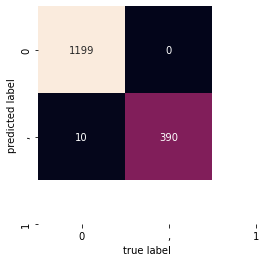

In [18]:
# solution
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

mat = confusion_matrix(prediction, y_train)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels="0,1", yticklabels="0,1")

print(classification_report(prediction, y_train))
plt.xlabel('true label')
plt.ylabel('predicted label')

After you get your prediciton `y_pred`, use the following code to generage you solution csv file:

In [26]:
y_pred = model.predict(X_test)
y_pred
#y_pred is predicted classifications for test emails

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
#Use the following code to export your .csv file and upload the same to WTCLASS.
df = pd.DataFrame({'Email ID':range(len(y_pred)),'Spam':y_pred})
df.to_csv("my_solution.csv",index=False)